#Digit Recognition using Convolutional Neural Network

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mnist_data = tf.keras.datasets.mnist
train, test = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We see that, image size = 28 x 28

Train data size = 60,000

Test data size = 10,000

Example drawing of an image

Some digits in the datatset:



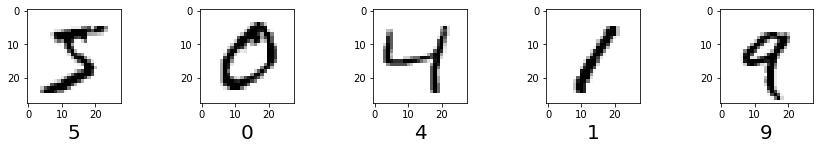

In [0]:
print('Some digits in the datatset:\n')
plt.figure(figsize=(15,10))
plt.xticks([])
plt.yticks([])
plt.subplot(5, 5, 1)
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.xlabel(y_train[0], {'size': 20})
plt.subplot(5, 5, 2)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.xlabel(y_train[1], {'size': 20})
plt.subplot(5, 5, 3)
plt.imshow(X_train[2], cmap=plt.cm.binary)
plt.xlabel(y_train[2], {'size': 20})
plt.subplot(5, 5, 4)
plt.imshow(X_train[3], cmap=plt.cm.binary)
plt.xlabel(y_train[3], {'size': 20})
plt.subplot(5, 5, 5)
plt.imshow(X_train[4], cmap=plt.cm.binary)
plt.xlabel(y_train[4], {'size': 20})
plt.show()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)/255

In [0]:
model = Sequential()

model.add(Conv2D(
    input_shape=(28, 28, 1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Flatten())

model.add(Dense(
    units=128,
    activation='relu'
));

model.add(Dropout(0.2))

model.add(Dense(
    units=10,
    activation='softmax',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2066 - accuracy: 0.9358 - val_loss: 0.0587 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0736 - accuracy: 0.9773 - val_loss: 0.0450 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.0398 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0459 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0347 -

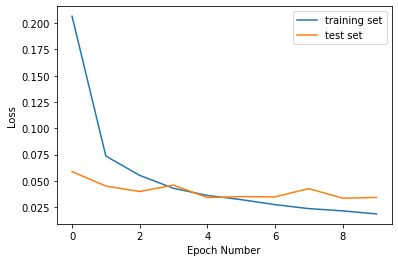

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

##Evaluating the Model

In [0]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0087 - accuracy: 0.9971


In [0]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.008675923570990562
Training accuracy:  0.9971166849136353


In [0]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0342 - accuracy: 0.9892


In [0]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03420722484588623
Validation accuracy:  0.9891999959945679


Saving the model:

In [0]:
model_name = 'cnn_dig_recog.h5'
model.save(model_name, save_format='h5')

In [0]:
loaded_model = tf.keras.models.load_model(model_name)

In [0]:
prediction = loaded_model.predict(X_test)
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,9.938127e-16,8.683298e-12,5.202303e-11,1.109629e-10,8.658491e-12,1.113375e-14,5.615607e-19,1.000000e+00,6.646594e-14,2.843886e-08
1,6.723853e-10,3.642471e-10,1.000000e+00,2.721908e-12,2.048186e-20,6.198953e-20,5.015082e-15,3.607773e-11,4.692152e-14,9.765301e-15
2,8.954398e-12,9.999969e-01,1.233975e-07,1.079908e-12,1.317846e-06,1.554833e-09,7.959940e-08,1.437591e-06,1.389311e-07,3.571443e-10
3,1.000000e+00,4.018249e-15,1.347829e-10,7.104729e-14,6.038438e-15,1.357913e-10,5.012936e-09,3.816036e-12,5.424731e-10,1.084741e-10
4,1.312485e-13,1.877414e-13,6.877595e-14,1.551550e-16,1.000000e+00,1.777903e-13,1.325909e-12,1.028757e-14,1.983511e-14,3.035616e-08
...,...,...,...,...,...,...,...,...,...,...
9995,4.269693e-15,4.846874e-13,1.000000e+00,1.120646e-11,4.261811e-18,3.671567e-20,6.538180e-15,2.708343e-09,8.447465e-13,1.045466e-17
9996,5.380394e-16,4.296347e-12,5.472865e-15,9.999998e-01,7.973206e-17,2.583525e-07,4.397094e-18,7.090071e-13,1.396567e-14,2.079806e-08
9997,9.844960e-17,7.635734e-11,4.668318e-14,7.142174e-18,1.000000e+00,1.069028e-14,5.920682e-12,1.378058e-11,2.055704e-09,3.832848e-13
9998,3.418252e-12,6.316033e-16,1.031791e-17,1.192920e-05,5.705932e-15,9.995173e-01,2.405155e-08,5.221620e-14,4.708184e-04,7.387735e-10


In [0]:
prediction = np.argmax(prediction, axis=1)

In [0]:
prediction.shape

(10000,)

In [0]:
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5
